In [480]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style as style 
style.use('fivethirtyeight')
style.use('bmh')

pd.set_option('display.max_colwidth', None)

plt.rcParams['figure.figsize'] = [10, 10]

In [481]:
#Load engagement data

eng = pd.read_csv('takehome_user_engagement.csv')
eng.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [482]:
#Load user data

users = pd.read_csv('takehome_users.csv',encoding = 'Latin1')


In [483]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [484]:
eng.shape

(207917, 3)

In [485]:
eng.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [486]:
#Convert to date time type
eng['time_stamp'] = pd.to_datetime(eng['time_stamp'])

In [487]:
eng.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [488]:
#Create new columns of week and year
eng['week'] = eng['time_stamp'].dt.isocalendar().week
eng['year'] = eng['time_stamp'].dt.year
eng['month'] = eng['time_stamp'].dt.month
eng['day_of_month'] = eng['time_stamp'].dt.day
eng['day_of_week'] = eng['time_stamp'].dt.weekday
eng['hour'] = eng['time_stamp'].dt.hour

In [489]:
eng

,time_stamp,user_id,visited,week,year,month,day_of_month,day_of_week,hour
0,2014-04-22 03:53:30,1,1,17,2014,4,22,1,3
1,2013-11-15 03:45:04,2,1,46,2013,11,15,4,3
2,2013-11-29 03:45:04,2,1,48,2013,11,29,4,3
3,2013-12-09 03:45:04,2,1,50,2013,12,9,0,3
4,2013-12-25 03:45:04,2,1,52,2013,12,25,2,3
...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,36,2013,9,6,4,6
207913,2013-01-15 18:28:37,11997,1,3,2013,1,15,1,18
207914,2014-04-27 12:45:16,11998,1,17,2014,4,27,6,12
207915,2012-06-02 11:55:59,11999,1,22,2012,6,2,5,11


/Users/subikshc/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/subikshc/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/Users/subikshc/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/subikshc/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dt

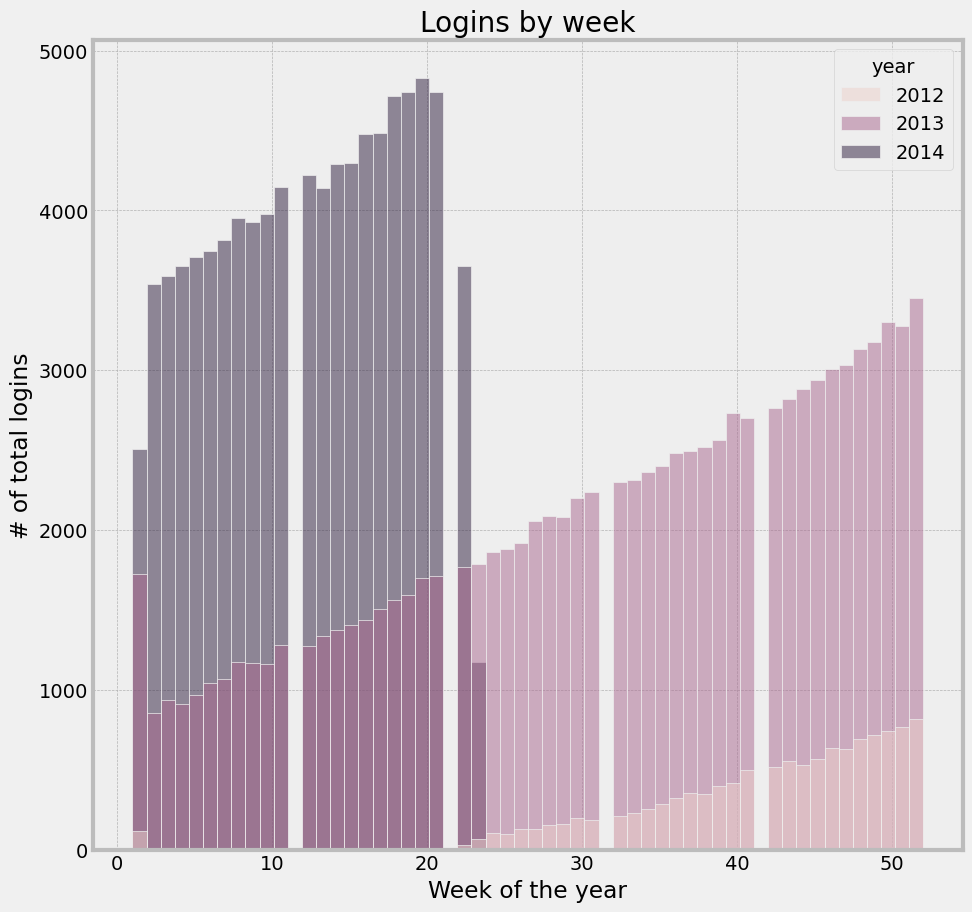

In [490]:
_ = sns.histplot(x = 'week', data = eng, hue = 'year')
plt.title('Logins by week')
plt.xlabel('Week of the year')
plt.ylabel('# of total logins')
plt.show()

Plot shows that logins have consistently been increasing year over year, week over week 

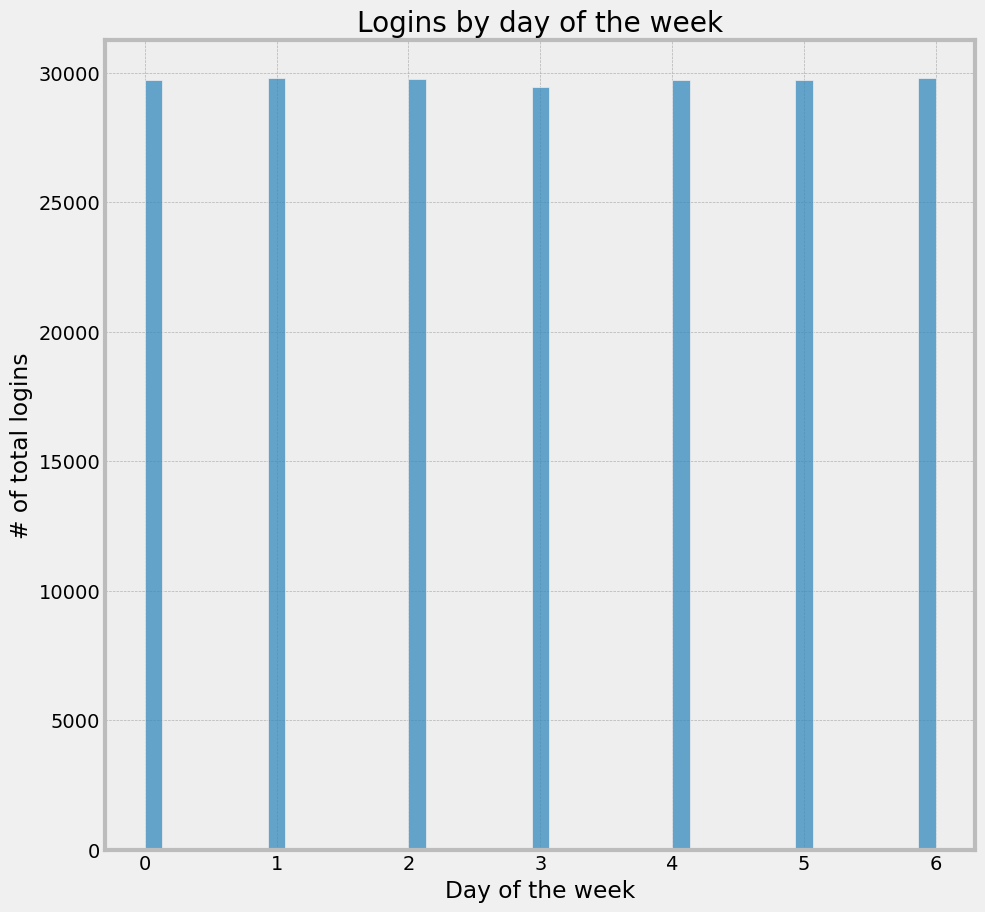

In [491]:
_ = sns.histplot(x = 'day_of_week', data = eng)
plt.title('Logins by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('# of total logins')
plt.show()

Plot shows consistent logins throughout the week

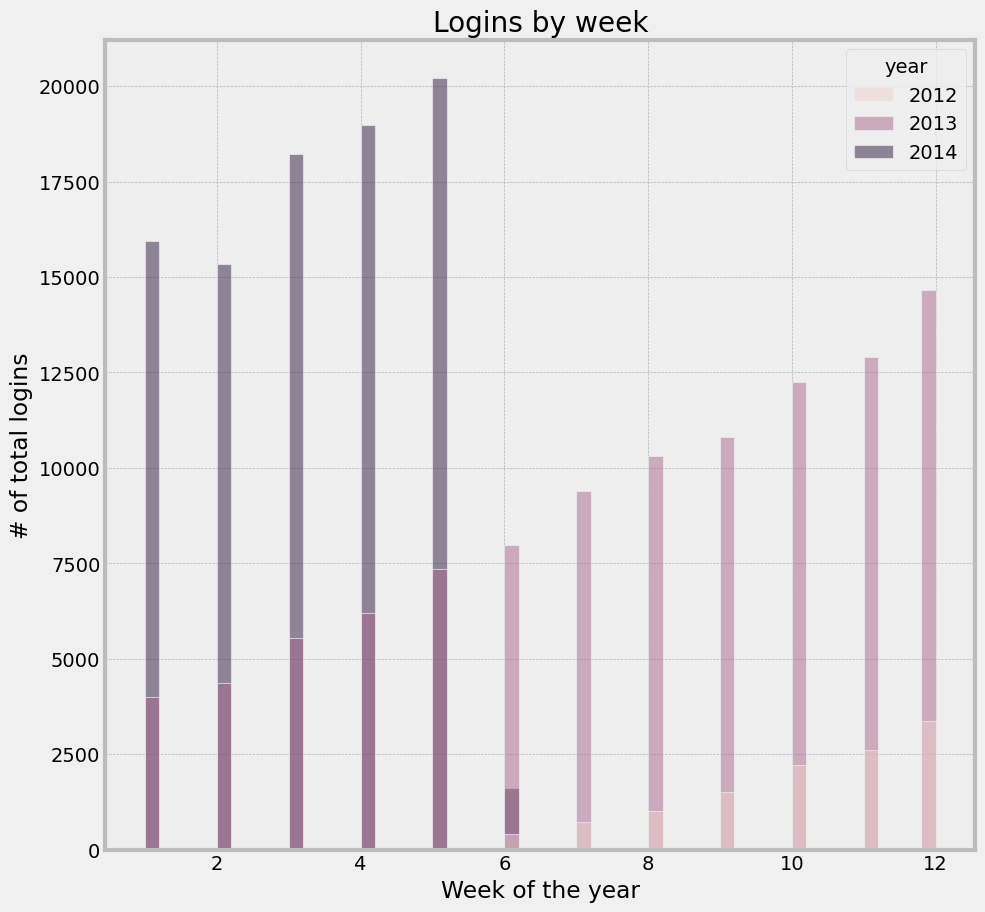

In [492]:
_ = sns.histplot(x = 'month', data = eng, hue = 'year')
plt.title('Logins by week')
plt.xlabel('Week of the year')
plt.ylabel('# of total logins')
plt.show()

Although plot shows differences in months, this is mainly explained by steady increase in logins over time and data only collected till month 5 of 2014. 

In [493]:
eng = eng.sort_values(by=['user_id', 'time_stamp'])

In [494]:
grouped = eng.groupby('user_id')

In [495]:
#Helper function to find adopted users

def adopted_finder(df = grouped):
    #Create list that will collect user_ids of adopted users
    adopted = []
    
    
    for user_id, group in grouped:
        group = group.reset_index(drop=True)

        
        for i in range(len(group) - 2):

            start = group.loc[i, 'time_stamp']
            end = start + (pd.Timedelta(days = 7))
                
            #Check if there are three dates within a 7 day range    
            if (group.loc[i + 1, 'time_stamp']< end) and (group.loc[i + 2, 'time_stamp'] < end):

                adopted.append(user_id)
                break
                
    return adopted            
    
            
        
        
    

In [496]:
adopted_users = adopted_finder()
len(adopted_users)

#This created list of usesr_ids of adopted users; there are 1602 in total

1602

In [497]:
total_logins = eng.groupby('user_id')['visited'].agg('sum')

In [498]:
#Create new dataframe with total number of logins for each user

total_logins = pd.DataFrame(total_logins)
total_logins

,visited
user_id,
1,1
2,14
3,1
4,1
5,1
...,...
11996,1
11997,1
11998,1


Text(0.5, 1.0, 'Histogram of total logins')

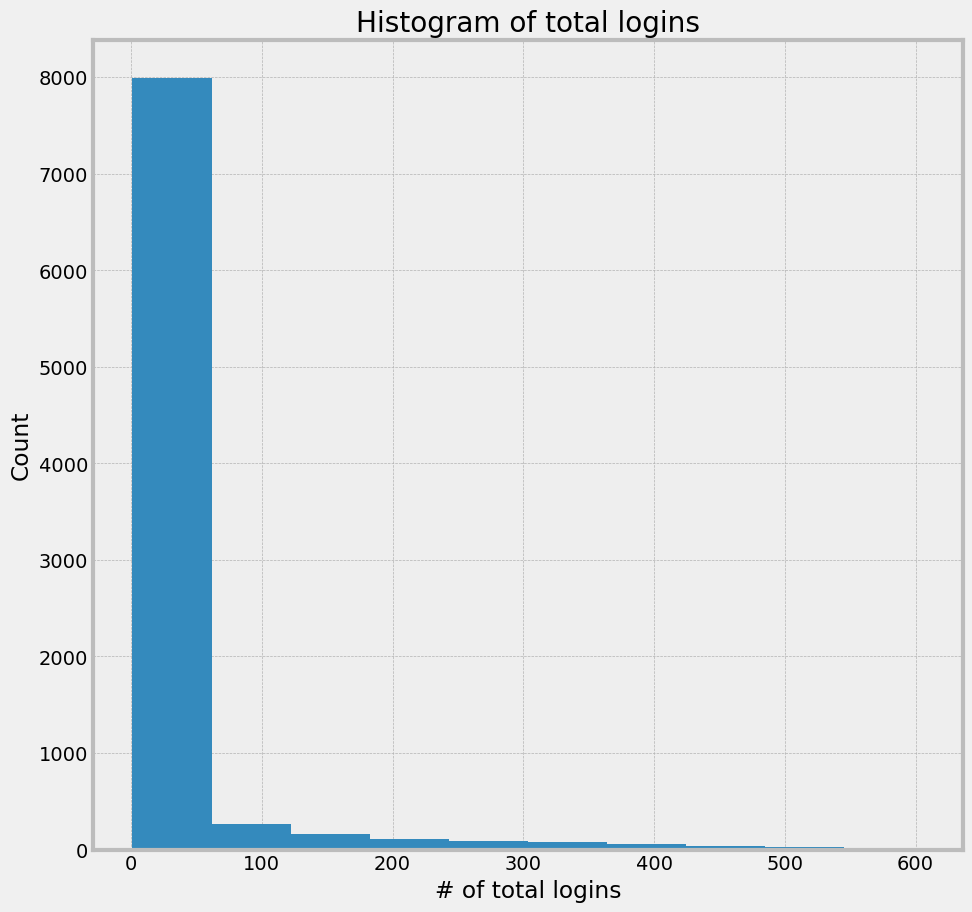

In [499]:
total_logins.hist()
plt.ylabel('Count')
plt.xlabel('# of total logins')
plt.title('Histogram of total logins')

In [500]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [501]:
def adopted_labeler(id):
    #Helper function to label as adopted or not 
    if id in adopted_users:
        return 1
    else:
        return 0


In [502]:
#Create new column for target variable - adopted 
users['adopted'] = users['object_id'].apply(adopted_labeler)

In [503]:
users['adopted'].value_counts()

0    10398
1     1602
Name: adopted, dtype: int64

In [504]:
users = pd.merge(users,total_logins,how = 'left',left_on = 'object_id',right_on = 'user_id')

In [505]:
users.rename(columns = {'visited':'total_logins'},inplace = True)
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,total_logins
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0,1.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0,1.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0,1.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0,1.0


In [506]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted                          0
total_logins                  3177
dtype: int64

Many null values for 'invited_by_user_id' and hard to use this data for anything predictive so will drop it

In [507]:
users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted                         int64
total_logins                  float64
dtype: object

In [508]:
#Convert time columns into datetime types
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

/Users/subikshc/anaconda3/lib/python3.11/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


In [509]:
#Create new columns calculating time since last login
users['days_since_creation'] = (pd.Timestamp.now() - users['creation_time']).dt.days
users['days_since_last_login'] = (pd.Timestamp.now() - users['last_session_creation_time']).dt.days


In [510]:
#Fill Nan values with large value to indicate have not logged in long time
users['days_since_last_login'].fillna(users['days_since_last_login'].max() + 1, inplace=True)

In [511]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,total_logins,days_since_creation,days_since_last_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1.0,3745,3745.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,14.0,3903,3767.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1.0,4144,4144.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1.0,4081,4080.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1.0,4205,4200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0,1.0,3973,3973.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN,0,1.0,4212,4207.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0,1.0,3740,3740.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN,0,1.0,4436,4434.0


In [512]:
corr_matrix = users.corr(numeric_only = True)

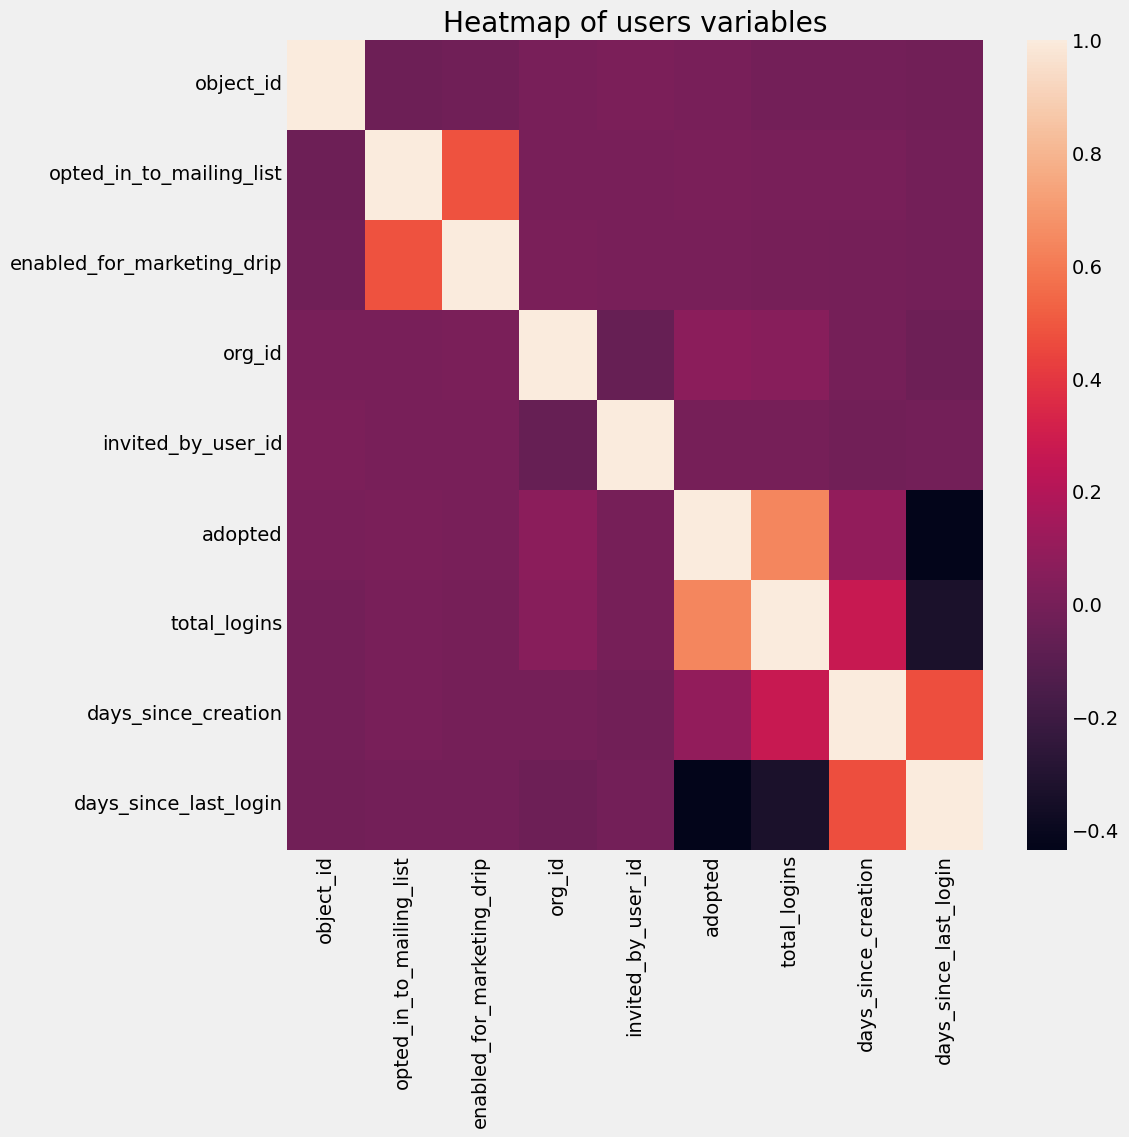

In [513]:
#Create heatmap to see correlation between numeric features and adoption rate

sns.heatmap(data=corr_matrix)
plt.title('Heatmap of users variables')
plt.show()

Heatmap shows last session creation time and total logins as having correlation with adodption rate. Focusing on number of logins appears to be a strong indicator of adoption. 

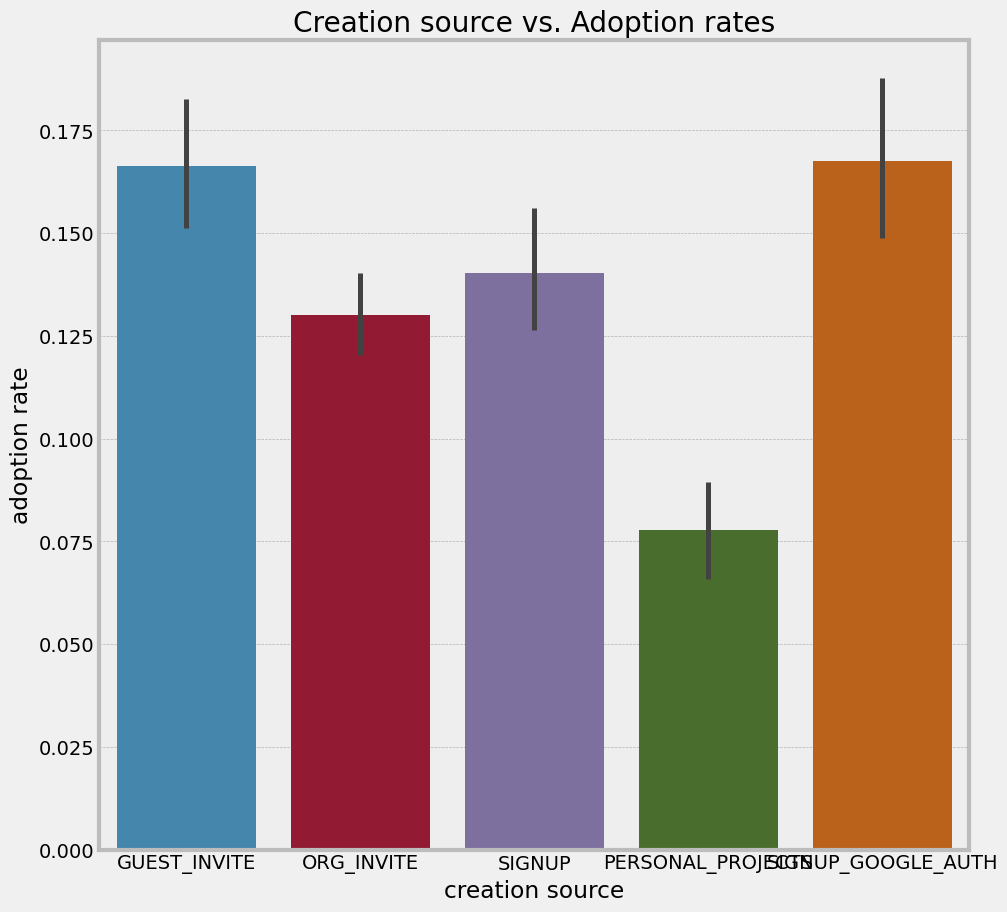

In [514]:
#Create barplot grouping by creation source and looking at adoption

_ = sns.barplot(x =users.creation_source, y = users.adopted)
plt.title('Creation source vs. Adoption rates')
plt.xlabel('creation source')
plt.ylabel('adoption rate')
plt.show()

Graph shows creation source as personal projects seem to have significantly lower adoption rate. 

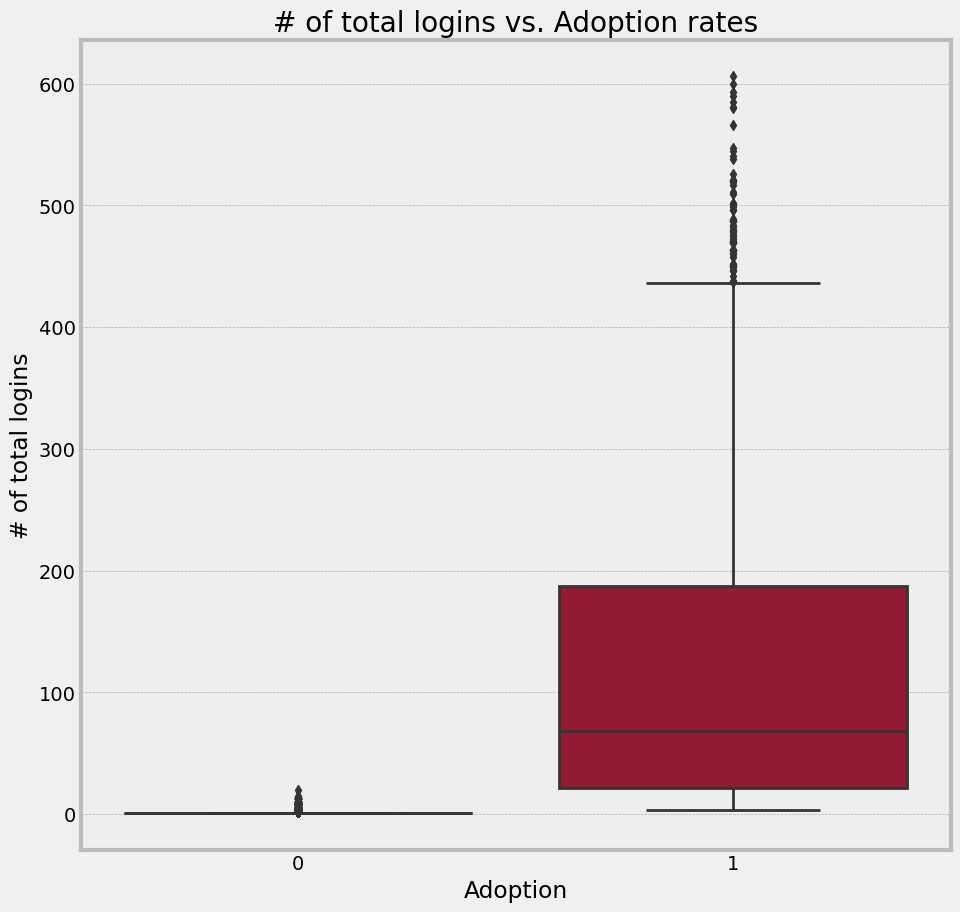

In [515]:
#Create boxplot grouping by # of total logins and looking at adoption

_ = sns.boxplot(y ='total_logins', x = 'adopted', data = users)
plt.title('# of total logins vs. Adoption rates')
plt.xlabel('Adoption')
plt.ylabel('# of total logins')
plt.show()

Large variance between adopted and not adopted in total log ins. However, definition of 'adopted' is derived from log-ins so might be circular in logic and not very insightful. 

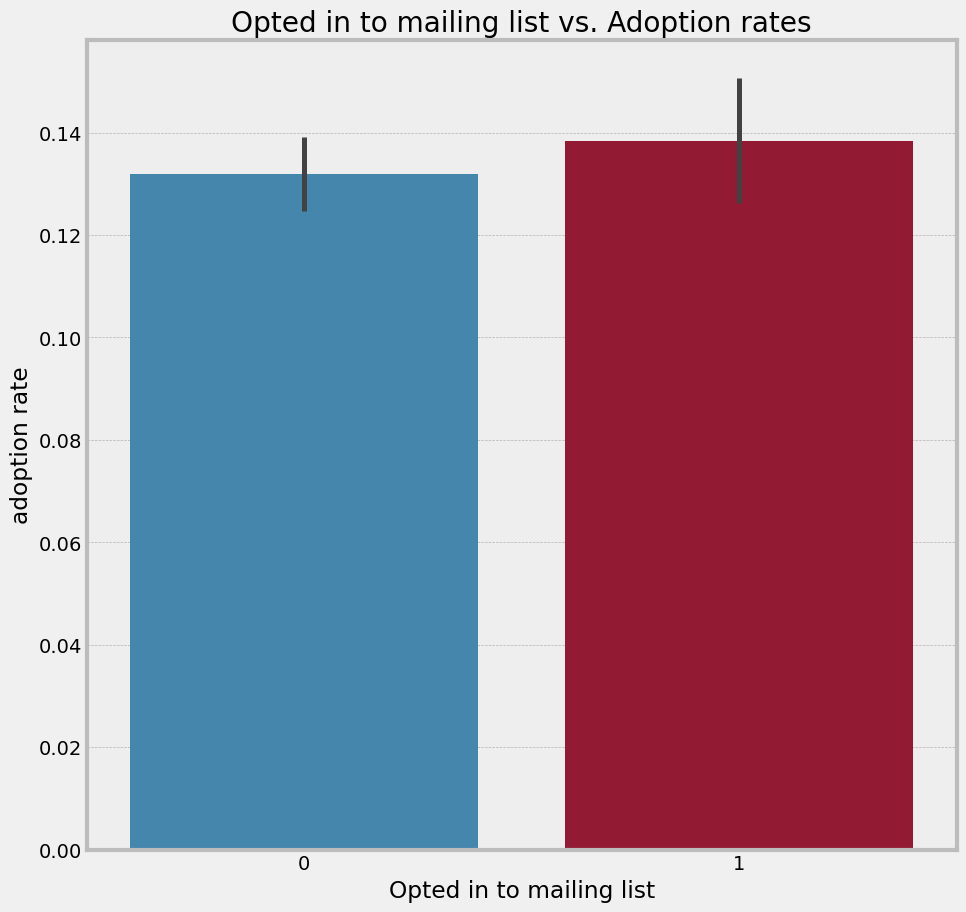

In [516]:
#Create barplot grouping by those opted in to mailing list and looking at adoption

_ = sns.barplot(x =users.opted_in_to_mailing_list, y = users.adopted)
plt.title('Opted in to mailing list vs. Adoption rates')
plt.xlabel('Opted in to mailing list')
plt.ylabel('adoption rate')
plt.show()

Not noticeable difference in adoption between those that opted in to mailing list vs not. 

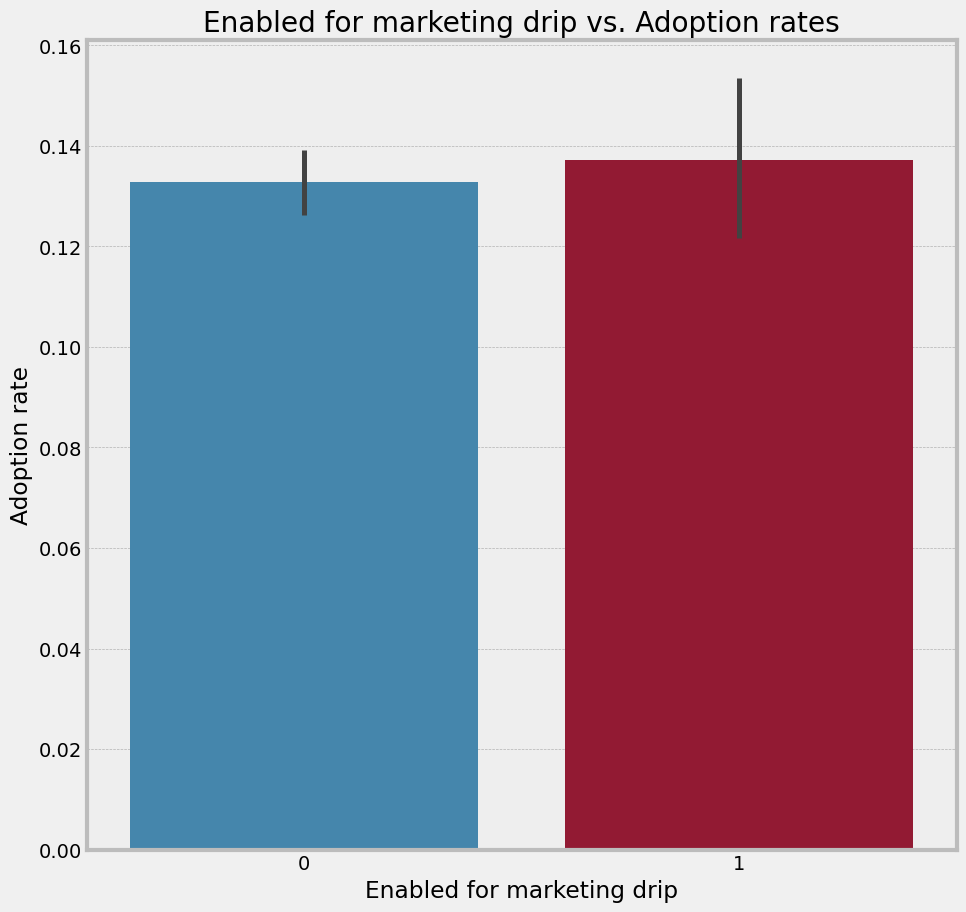

In [517]:
#Create barplot grouping by those opted in to mailing list and looking at adoption

_ = sns.barplot(x =users.enabled_for_marketing_drip, y = users.adopted)
plt.title('Enabled for marketing drip vs. Adoption rates')
plt.xlabel('Enabled for marketing drip')
plt.ylabel('Adoption rate')
plt.show()

There is no signficant difference in adoption between those enabled for marketing drip or not. 

In [518]:
org_adoption_ratio = users.groupby('org_id')['adopted'].mean().reset_index()
org_adoption_ratio.columns = ['org_id', 'adoption_ratio']

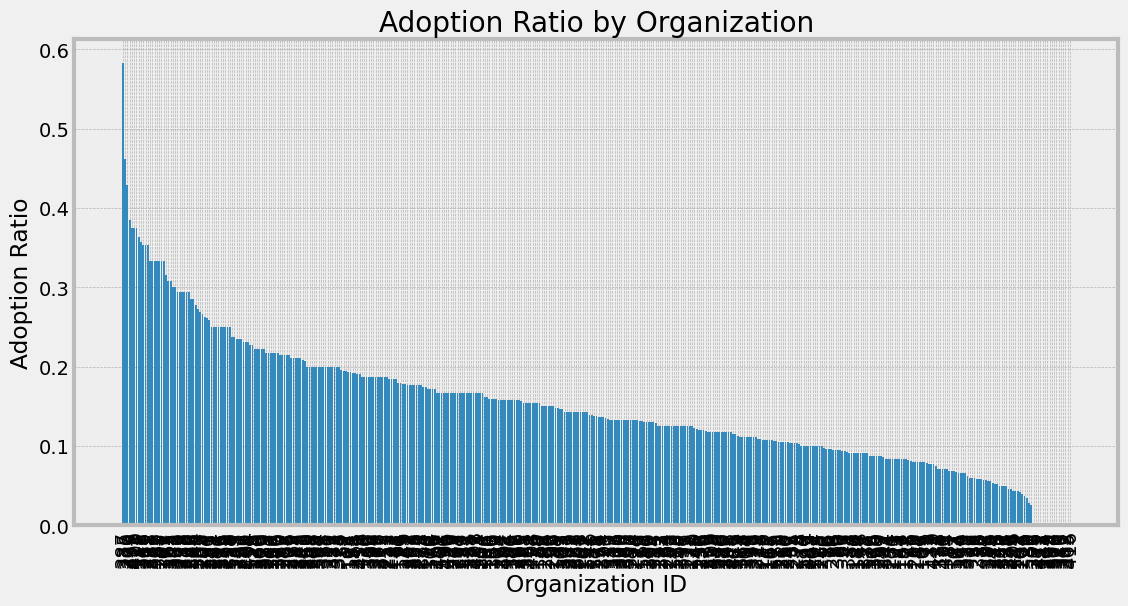

In [519]:
org_sorted = org_adoption_ratio.sort_values(by = 'adoption_ratio',ascending = False)

plt.figure(figsize=(12, 6))
plt.bar(org_sorted['org_id'].astype(str), org_sorted['adoption_ratio'])
plt.xlabel('Organization ID')
plt.ylabel('Adoption Ratio')
plt.title('Adoption Ratio by Organization')
plt.xticks(rotation=90)
plt.show()

In [520]:
# Calculate the count of users for each organization
org_user_count = users.groupby('org_id')['adopted'].count().reset_index()
org_user_count.columns = ['org_id', 'user_count']


In [521]:

org_data = pd.merge(org_adoption_ratio, org_user_count, on='org_id')
org_data = org_data.sort_values(by='adoption_ratio', ascending=False)

/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_22746/1846212447.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(org_data['org_id'].astype(str), rotation=90)


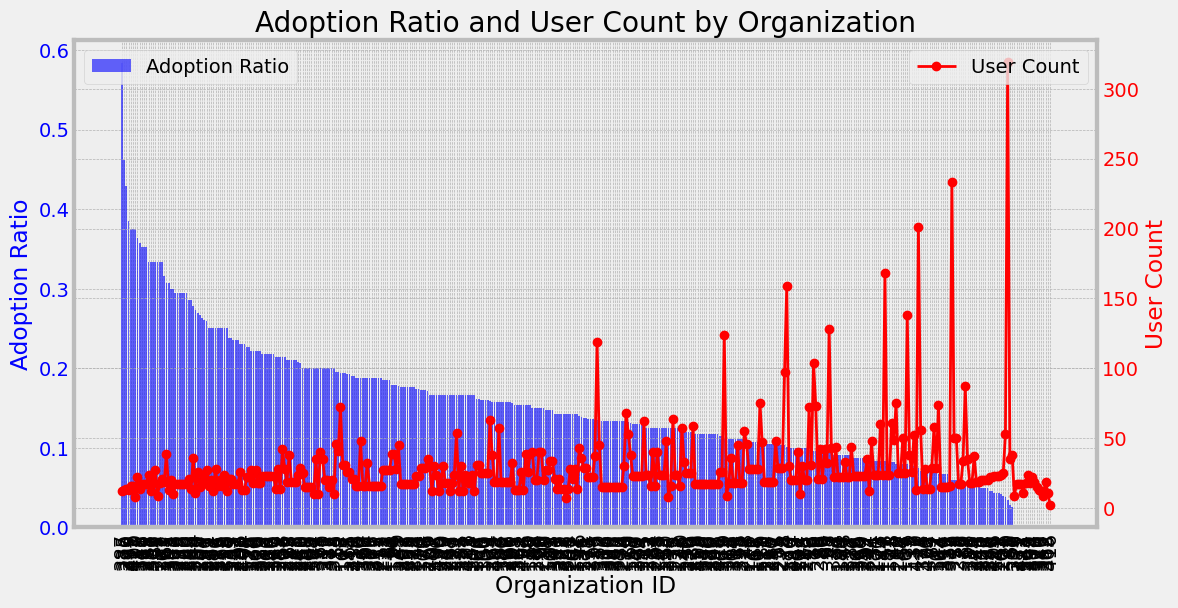

In [522]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for adoption ratio
ax1.bar(org_data['org_id'].astype(str), org_data['adoption_ratio'], color='b', alpha=0.6, label='Adoption Ratio')
ax1.set_xlabel('Organization ID')
ax1.set_ylabel('Adoption Ratio', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticklabels(org_data['org_id'].astype(str), rotation=90)

# Line plot for user count
ax2 = ax1.twinx()
ax2.plot(org_data['org_id'].astype(str), org_data['user_count'], color='r', marker='o', label='User Count')
ax2.set_ylabel('User Count', color='r')
ax2.tick_params('y', colors='r')

# Add legends
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Adoption Ratio and User Count by Organization')
plt.show()


Graph shows inverse relation between adoption rate and count of users in org id. It appears that organizations with fewer users seem to have higher adoption rate. This could simply be because the larger number of users drives that rate down or could be weaknesses in the system as the number of users scales

**In summary, the marketing list and marketing drip do not appear to be strong indicators of adopted users. # of logins is a strong indicator however, it is closely tied to the definition of an adopted user. There are some notable differences in creation source that the company can look closer into. There are differences in adoption in org id that need to be further explored as well.** 

***Pre-processing***

In [523]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,total_logins,days_since_creation,days_since_last_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1.0,3745,3745.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,14.0,3903,3767.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1.0,4144,4144.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1.0,4081,4080.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1.0,4205,4200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0,1.0,3973,3973.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN,0,1.0,4212,4207.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0,1.0,3740,3740.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN,0,1.0,4436,4434.0


In [524]:
users['creation_time'] = pd.to_datetime(users['creation_time'])

In [525]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted                          0
total_logins                  3177
days_since_creation              0
days_since_last_login            0
dtype: int64

In [526]:
users['last_session_creation_time'] = users['last_session_creation_time'].fillna(0)

In [527]:
users['total_logins'] = users['total_logins'].fillna(0)

In [528]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted                          0
total_logins                     0
days_since_creation              0
days_since_last_login            0
dtype: int64

In [529]:
users['invited_by_user_id'].isnull().value_counts()

False    6417
True     5583
Name: invited_by_user_id, dtype: int64

In [530]:
def create_binary_empty(val):
        
            if val == 0:
                return 0
            else:
                return 1

    

In [531]:
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0)

In [532]:
users['invited'] = users['invited_by_user_id'].apply(create_binary_empty)

In [533]:
users['invited'].value_counts()

1    6417
0    5583
Name: invited, dtype: int64

In [534]:
users.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
adopted                       0
total_logins                  0
days_since_creation           0
days_since_last_login         0
invited                       0
dtype: int64

In [535]:
#Create list of columns to drop because not relevant (object_id, name, email, invited by)

#Some columns dropped because info is encoded into other features: creation time and last session time
#total logins is dropped because it is very closely tied to definition of target variable and thus will be 
#circular in logic if used by model

droppable_cols = ['object_id','name','email','invited_by_user_id','creation_time','total_logins',
                  'last_session_creation_time']

In [536]:
users.drop(columns = droppable_cols,inplace = True)

In [537]:
users

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,days_since_creation,days_since_last_login,invited
0,GUEST_INVITE,1,0,11,0,3745,3745.0,1
1,ORG_INVITE,0,0,1,1,3903,3767.0,1
2,ORG_INVITE,0,0,94,0,4144,4144.0,1
3,GUEST_INVITE,0,0,1,0,4081,4080.0,1
4,GUEST_INVITE,0,0,193,0,4205,4200.0,1
...,...,...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,0,3973,3973.0,1
11996,SIGNUP_GOOGLE_AUTH,0,0,200,0,4212,4207.0,0
11997,GUEST_INVITE,1,1,83,0,3740,3740.0,1
11998,PERSONAL_PROJECTS,0,0,6,0,4436,4434.0,0


In [538]:
users = pd.get_dummies(columns = ['creation_source','org_id'], data = users, drop_first = True)

In [539]:
users

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,days_since_creation,days_since_last_login,invited,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,...,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
0,1,0,0,3745,3745.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,3903,3767.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,4144,4144.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,4081,4080.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,4205,4200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,3973,3973.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11996,0,0,0,4212,4207.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11997,1,1,0,3740,3740.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11998,0,0,0,4436,4434.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [540]:
from sklearn.model_selection import train_test_split 

#Define feature and target variables

X = users.drop('adopted',axis = 1)
y = users['adopted']

#Create train, test split from data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [541]:
#Create dictionary to store model scores
model_eval = {}

In [542]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score



#Will first try a logistic regression model
#Create the model,fit to training data and evaluate score

lr_model = LogisticRegression()

lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)


acc_score = accuracy_score(y_test,y_pred)
cv_scores = cross_val_score(lr_model, X, y, cv=5)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean()}')


#Add scores to model dictionary
model_eval['Logistic regression'] = [acc_score]


print (f"Logistic Regression accuracy_score = {acc_score}")


print(classification_report(y_test,y_pred))

Cross-Validation Scores: [0.97291667 0.97125    0.97625    0.98041667 0.97416667]
Average Cross-Validation Score: 0.975
Logistic Regression accuracy_score = 0.97125
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2071
           1       0.94      0.84      0.89       329

    accuracy                           0.97      2400
   macro avg       0.96      0.92      0.94      2400
weighted avg       0.97      0.97      0.97      2400



In [543]:
feature_importance = pd.Series(lr_model.coef_[0], index=X_train.columns).sort_values(ascending=False)
print(feature_importance)

opted_in_to_mailing_list              0.539746
creation_source_SIGNUP_GOOGLE_AUTH    0.199963
org_id_19                             0.151132
creation_source_PERSONAL_PROJECTS     0.139657
org_id_339                            0.136713
                                        ...   
org_id_12                            -0.122875
org_id_187                           -0.123543
org_id_1                             -0.150140
creation_source_SIGNUP               -0.271029
creation_source_ORG_INVITE           -0.376899
Length: 425, dtype: float64


Logistic regression model performs very well and indicates that opting in to mailing list is a key indicator 
in user adoption. 

In [544]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)


acc_score = accuracy_score(y_test,y_pred)
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean()}')


#Add scores to model dictionary
model_eval['Random Forest'] = [acc_score]


print (f"Random Forest accuracy_score = {acc_score}")

print(classification_report(y_test,y_pred))

Cross-Validation Scores: [0.96666667 0.96208333 0.96666667 0.96333333 0.96041667]
Average Cross-Validation Score: 0.9638333333333333
Random Forest accuracy_score = 0.9604166666666667
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2071
           1       0.95      0.75      0.84       329

    accuracy                           0.96      2400
   macro avg       0.96      0.87      0.91      2400
weighted avg       0.96      0.96      0.96      2400



Random forest performs slightly worse, notably in recall of the positive target (0.74) 

30


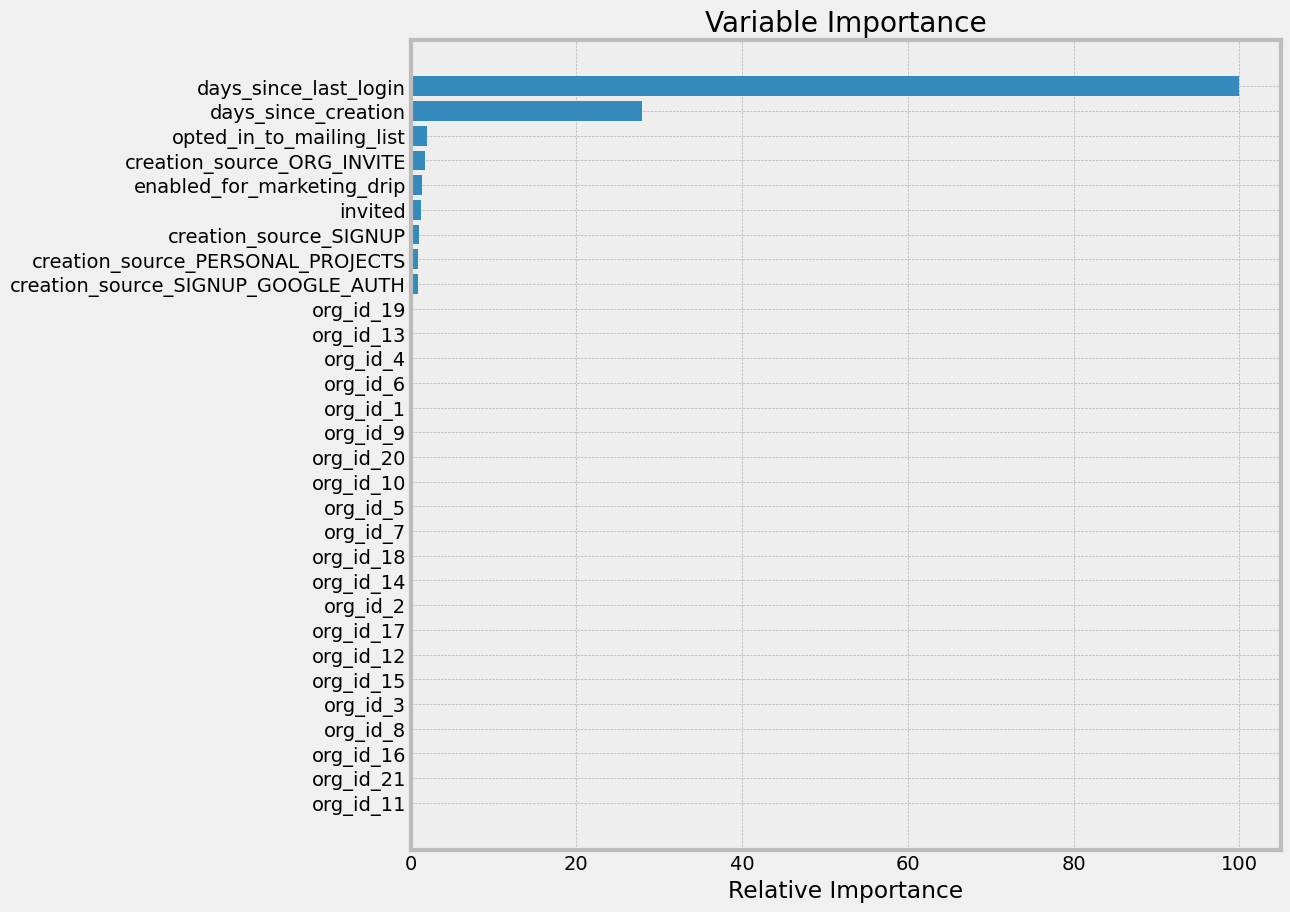

In [545]:
#Create plot of feature importance for random forest model

feature_importance = rf_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Model appears heavily skewed on days since last login and days since last creation rather than on marketing features. 

In [546]:
model_eval

{'Logistic regression': [0.97125], 'Random Forest': [0.9604166666666667]}